In [2]:
# Importing basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Importing scikit and related packages
from sklearn.datasets import make_blobs

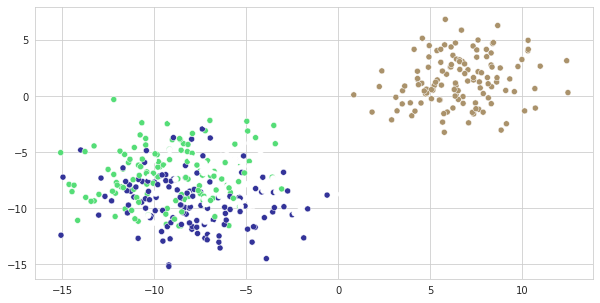

In [4]:
# Creating the dataset
dataset = make_blobs(centers=4, random_state=687, n_samples=500, cluster_std=2.4)
x, y = dataset

# Now let us plot this data
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], c=y, cmap=plt.cm.terrain)
plt.show()

It can be seen that the datapoints can be classified into multiple classes. 

## **Decision Tree Classifier**

In [5]:
# Importing the classifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Function to visuaize the decision tree for each model
def visualize_classifier(model, X, y, ax=None, cmap='cool'):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=100),
                         np.linspace(*ylim, num=100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = plt.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

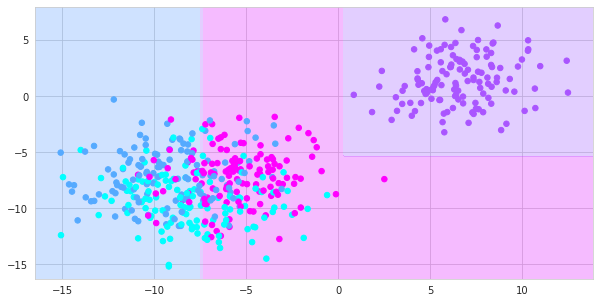

In [41]:
# Visulizing the DecisionTreeClassifier
visualize_classifier(DecisionTreeClassifier(max_depth=2, random_state=687), x, y)

## **Random Forest**

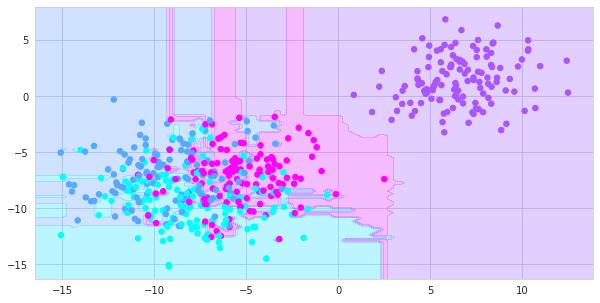

In [42]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Defining the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=786)

# Visualizing the classifier
visualize_classifier(rf_classifier, x, y)

Random forest can be used for regression like it is used for classification. Lets do it.

In [101]:
# Creating the random variable with random values
x_rfr = 10 * np.random.rand(100)

# Now let us create a function that could add noises to this
def add_noise(x, sigma=0.2):
  noise = sigma * np.random.rand(len(x))
  return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Noise signal
y_rfr = add_noise(x_rfr)

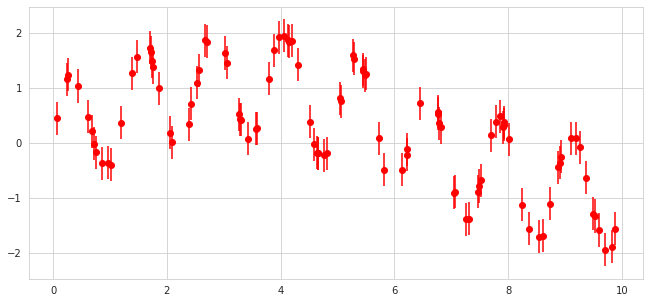

In [102]:
# Visulizing this noise signal
plt.figure(figsize=(11, 5))
plt.errorbar(x_rfr, y_rfr, yerr=0.3, fmt='o', color='red')
plt.show()

Clearly there is a pattern that can be viewed in this graph that can be dealt with a regression. Let us use Random Forest for this purpose.

Random Forest can fit a regression model to even a data that expresses only limited information.

In [106]:
# Lets import the necessory package first
from sklearn.ensemble import RandomForestRegressor

# Creating the model
rfr = RandomForestRegressor(random_state=786)

# Fitting the model
rfr.fit(x_rfr.reshape(-1, 1), y_rfr)

RandomForestRegressor(random_state=786)

In [126]:
# Creating inputs for predictions
x_rfr_test = np.linspace(0, 10, 1000)  # linspace gives values between ranges and third parameter defines the number of splits

# Finding the output using noise addition
y_rfr_test = add_noise(x_rfr_test)

# Prediction using model
rfr_pred = rfr.predict(x_rfr_test.reshape(-1, 1))

# Finding the mse
from sklearn.metrics import mean_squared_error
mean_squared_error(rfr_pred, y_rfr_test)

0.032906296278778994

The mse is very less. Let us now plot this

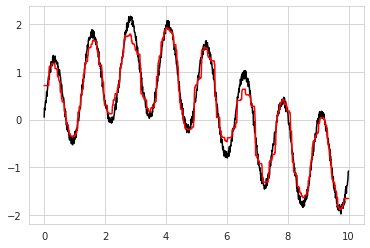

In [135]:
sns.lineplot(x=x_rfr_test, y=y_rfr_test, color='k')
sns.lineplot(x=x_rfr_test, y=rfr_pred, color='r')
plt.show()

The random forest regression is quite accurate here.